In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import math

In [2]:
#url
ruta = r'C:\Users\Usuario\Desktop\Estadistica\Isla1.xlsx'
ruta1 = r'C:\Users\Usuario\Desktop\Estadistica\Isla2.xlsx'

In [3]:
try:
    data1= pd.read_excel(ruta)
except FileNotFoundError:
    print("El archivo no se encuentra en la ruta de destino")
try:        
    data2 = pd.read_excel(ruta1)
except FileNotFoundError:
    print("El archivo no se encuentra en la ruta 1 de destino")

In [4]:
dataisland1=pd.DataFrame(data1)
dataisland1=dataisland1.drop(["Prefijo","Dispensador","Forma de Pago","Ticket","Num. Factura","Fecha Ventas"],axis=1)
dataisland2=pd.DataFrame(data2)
dataisland2=dataisland2.drop(["Prefijo","Dispensador","Forma de Pago","Ticket","Num. Factura","Fecha Ventas"],axis=1)
datatotal=pd.concat([dataisland1,dataisland2],ignore_index=True)#reiniciar el indice

In [5]:
dataisland1["Producto"][0]

'CORRIENTE'

In [6]:
datatotal["Producto"][0]

'CORRIENTE'

In [7]:
datatotal["Producto"].value_counts()

Producto
CORRIENTE    8857
DIESEL       2737
V-POWER      1210
Name: count, dtype: int64

In [8]:
#con este metodo se eliminan datos de la base
#filtro=datatotal["Producto"]=="CORRIENTE"
#data=datatotal[filtro]
#datatotal = datatotal.reset_index(drop=True)

In [9]:
datatotal["Producto"][1]

'CORRIENTE'

In [10]:
datacorriente = {}

for i in range(len(datatotal)):
    if datatotal["Producto"][i] == "CORRIENTE":
        datacorriente[i] = datatotal["Producto"][i]

#comprobacion y validacion de los flitro se procede a trabajar con los flitros
data={}
for i in range(len(datatotal)):
    if datatotal["Producto"][i]=="CORRIENTE":
        data[i]=datatotal["Producto"][i]
df=pd.DataFrame({
    "data":data
    }) 

In [11]:
def filtro1 (def_datatotal,def_Tipo):
    filtro = def_datatotal["Producto"] == def_Tipo
    datacorriente = def_datatotal[filtro]
    return datacorriente

In [12]:
Tipo1="CORRIENTE"
datacorriente=filtro1(datatotal,Tipo1)
datacorriente.reset_index(drop=True, inplace=True)#reseo en el indice para que no hallan icovenientes a la hora de las comparciones me paso abajo con sacar las frecuencias al buscar por el nombre de la coluna y si poscion


In [13]:
datacorriente

,Producto,Galones,Valor Venta
0,CORRIENTE,3448.000,50000.0
1,CORRIENTE,2615.000,37918.0
2,CORRIENTE,2635.000,38208.0
3,CORRIENTE,3938.000,57101.0
4,CORRIENTE,0.690,10000.0
...,...,...,...
8852,CORRIENTE,1325.000,20000.0
8853,CORRIENTE,0.662,10000.0
8854,CORRIENTE,0.662,10000.0
8855,CORRIENTE,6623.000,100000.0


In [14]:
#Maximo y Minimos 
Xmax=datacorriente["Galones"].max()
Xmin=datacorriente["Galones"].min()
#Rango
Rango=Xmax-Xmin
#numero de datos
n=len(datacorriente)



In [15]:
import math
#Numero de intervalos Stuarges re dondeo por defecto
m=int(1+3.3*math.log(n))#redondeo por defecto ejemplo 1,5=1
#Longitud del intervalo
C=round(Rango/m,0)#redondeo por exceso ejemplo 1,5=2

In [16]:
C

903.0

In [17]:
C*m

27090.0

In [18]:
Rango

27075.999

In [19]:
max

<function max>

In [20]:
lim=0
lim+=93+C
lim

996.0

In [21]:
def rangosuperior():
    limite = []
    lim = 0
    for i in range(m):
        lim += C
        limite.append(lim)
    dfsuperior=pd.DataFrame({
        "LS":limite
    })   
    return dfsuperior


In [22]:
def rangoinferior():
    limite=[]
    lim=0
    limite.append(0)
    for i in range(m-1):
        lim += C
        limite.append(lim)
    dfsuperior=pd.DataFrame({
        "LI":limite
    })   
    return dfsuperior    


In [23]:
def marcadeclase(dfsuperior):
    marca=[]
    lim=0
    for i in range(len(dfsuperior)):
        lim = (dfsuperior["LS"][i])/2
        marca.append(lim)
    dfsuperior=pd.DataFrame({
        "X(i)":marca
    })   
    return dfsuperior   

In [24]:
def porcentaje(def_frecuencias):
    porcentaje=[]
    porcentajeacumulados=[]
    porcentaje_1=[]
    acumulado=0
    Total=def_frecuencias["f(i)"].sum()
    for i in range(m):
        promedio=(def_frecuencias["f(i)"][i]/Total).round(3)
        porcentaje.append(promedio)
        porcentaje_1.append(1-(promedio))
        acumulado+=porcentaje[i]
        porcentajeacumulados.append(acumulado)
    dfporcentanjes=pd.DataFrame({
        "h(i)":porcentaje,
        "h(1-i)":porcentaje_1,
        "H(i)":porcentajeacumulados
    })    
    return dfporcentanjes    



In [25]:
def ciclofrecuencia(def_datacorriente, def_LS, def_LI):
    frecuencia = []
    acumulado_resultado=0
    frecuenciaacumulado=[]
    for j in range(len(def_LS)):
        ls = def_LS["LS"][j]
        li = def_LI["LI"][j]
        
        countfrecuencias = 0  # Reiniciar 
        
        for i in range(len(def_datacorriente)):
            galones = def_datacorriente["Galones"][i]
            
            if li < galones < ls:  # Modificar la condición para evitar problemas con los límites
                countfrecuencias += 1
        
        frecuencia.append(countfrecuencias)
        acumulado_resultado+=countfrecuencias
        frecuenciaacumulado.append(acumulado_resultado)
    
    dffrecuencias=pd.DataFrame({
        "f(i)":frecuencia,    
    })
    
    dffrecuenciasacumulada=pd.DataFrame({
        "F(i)":frecuenciaacumulado  
    })
    return  dffrecuenciasacumulada,dffrecuencias

In [56]:
def media(marcadeclases, frecuencias):
    N = frecuencias["f(i)"].sum()  # Sumar la columna específica de frecuencias
    media = 0
    half = []

    for i in range(len(marcadeclases)):
        media = round((marcadeclases["X(i)"][i] * frecuencias["f(i)"][i]) / N,2)
        half.append(media)

    dfmedia = pd.DataFrame({
        "X(i)*f(i)": half
    })
    return dfmedia

In [57]:
def varianza(frecuencias,marcadeclases,media):
    calculovarianza=0
    calculodesviacion_estandar=0
    varianza=[]
    desviacion_estandar=[]
    N = frecuencias["f(i)"].sum()
    for i in range(len(frecuencias)):
        resultado=(marcadeclases["X(i)"][i]-media["X(i)*f(i)"][i])
        a=math.pow(resultado,2)
        calculovarianza=round((frecuencias["f(i)"][i]*(a))/(N-1),2)
        calculodesviacion_estandar=round(math.sqrt(calculovarianza),2)
        desviacion_estandar.append(calculodesviacion_estandar)
        varianza.append(calculovarianza)
    defvarianza=pd.DataFrame({
        "s^2":varianza
        
    })
    defdesviacion_estadar=pd.DataFrame({
        "s":desviacion_estandar
    })    
    return defvarianza,defdesviacion_estadar

In [58]:
LI=rangoinferior()
LS=rangosuperior()
marcadeclases=marcadeclase(LS)
frecuenciasAcumulada,frecuencias=ciclofrecuencia(datacorriente,LS,LI)
medias=media(marcadeclases,frecuencias)
varianzas,desviacion_estandar=varianza(frecuencias,marcadeclases,medias)
porcentajes=porcentaje(frecuencias)


In [59]:
TablaFrecuencias=pd.concat([LI,LS,marcadeclases,frecuencias,frecuenciasAcumulada,porcentajes,medias,varianzas,desviacion_estandar],ignore_index=False,axis=1)

In [60]:
TablaFrecuencias

,LI,LS,X(i),f(i),F(i),h(i),h(1-i),H(i),X(i)*f(i),s^2,s
0,0.0,903.0,451.5,2263,2263,0.256,0.744,0.256,115.37,28874.24,169.92
1,903.0,1806.0,903.0,2415,4678,0.273,0.727,0.529,246.24,117636.46,342.98
2,1806.0,2709.0,1354.5,1560,6238,0.176,0.824,0.705,238.60,219374.72,468.37
3,2709.0,3612.0,1806.0,1355,7593,0.153,0.847,0.858,276.32,358056.78,598.38
4,3612.0,4515.0,2257.5,300,7893,0.034,0.966,0.892,76.47,161159.52,401.45
5,4515.0,5418.0,2709.0,253,8146,0.029,0.971,0.921,77.39,197867.75,444.82
6,5418.0,6321.0,3160.5,110,8256,0.012,0.988,0.933,39.26,121020.36,347.88
7,6321.0,7224.0,3612.0,257,8513,0.029,0.971,0.962,104.82,356993.80,597.49
8,7224.0,8127.0,4063.5,64,8577,0.007,0.993,0.969,29.37,117622.71,342.96
9,8127.0,9030.0,4515.0,59,8636,0.007,0.993,0.976,30.08,134021.00,366.09


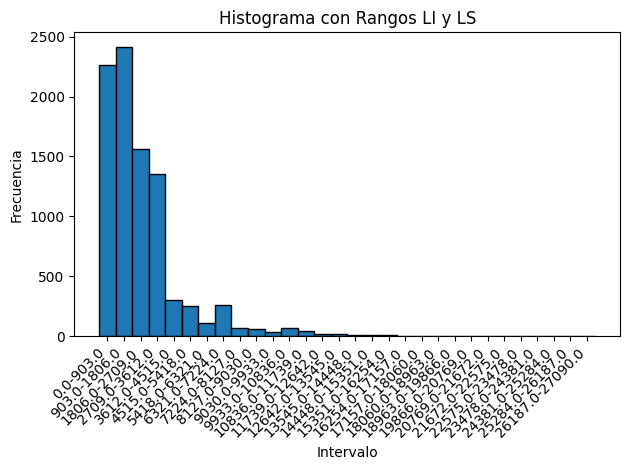

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que tienes un DataFrame llamado TablaFrecuencias con columnas LI, LS y f(i)
# Asegúrate de tener estas columnas en tu DataFrame
# TablaFrecuencias = ...

# Crear etiquetas para cada barra combinando LI y LS
etiquetas = [f'{LI}-{LS}' for LI, LS in zip(TablaFrecuencias['LI'], TablaFrecuencias['LS'])]

# Crear un histograma
plt.bar(etiquetas, TablaFrecuencias['f(i)'], width=1, edgecolor='black')

# Personalizar el gráfico
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia')
plt.title('Histograma con Rangos LI y LS')

# Rotar etiquetas para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

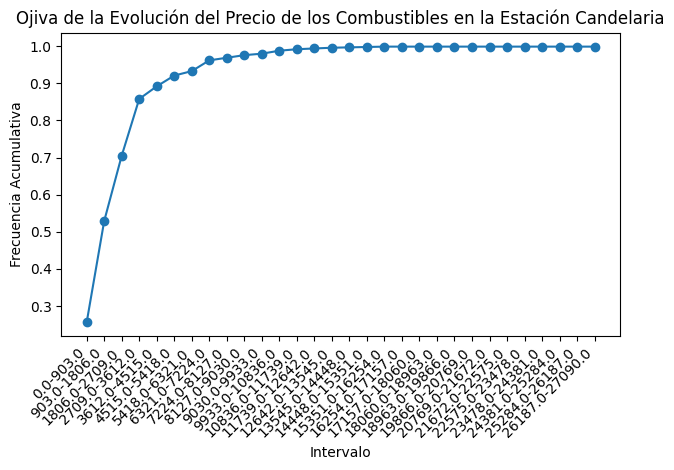

In [62]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado TablaFrecuencias con columnas LI, LS y H(i)
# Asegúrate de tener estas columnas en tu DataFrame
# TablaFrecuencias = ...

# Crear etiquetas para cada punto combinando LI y LS
etiquetas = [f'{LI}-{LS}' for LI, LS in zip(TablaFrecuencias['LI'], TablaFrecuencias['LS'])]

# Calcular la frecuencia acumulativa (H(i))
frecuencia_acumulativa = TablaFrecuencias['H(i)']

# Crear una ojiva con líneas continuas
plt.plot(etiquetas, frecuencia_acumulativa, marker='o', linestyle='-')

# Personalizar el gráfico
plt.xlabel('Intervalo')
plt.ylabel('Frecuencia Acumulativa')
plt.title('Ojiva de la Evolución del Precio de los Combustibles en la Estación Candelaria')

# Rotar etiquetas para mayor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajustar diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [67]:
def percentiles(percentil,def_frecuenciasAcumulada,def_C,def_LI,def_LS):
    k=percentil
    n=def_frecuenciasAcumulada["F(i)"].iloc[-1]#ultimo dato de frecuencia acumuladas
    posicion=(k*n)/100
    Amplitud=def_C
    i=0
    for j in range(m):
        F=def_frecuenciasAcumulada["F(i)"][j]
        if F < posicion :
            i=j+1
    if i ==0:#Para controlar el error de cuando la posicion de f(i-1)>0 es negativa
        fi_1 = 1  
    else:
        fi_1 = def_frecuenciasAcumulada["F(i)"][i-1]
    f1=def_frecuenciasAcumulada["F(i)"][i]
    Li=int(def_LI["LI"][i])
    Ls=int(def_LS["LS"][i])
    d1=(posicion - fi_1 )
    d2=( f1 - fi_1 )
    Pk= Li + ( Amplitud *  (d1 / d2))
    print("Respuesta del metodo calcular percentil: ")
    print("posicion",posicion)
    print("i:",i)
    print("f(i):",f1)  
    print("f(i-1):",fi_1)
    print("Li:",Li)
    print("Ls:",Ls)
    print("Pk :",Pk)
    return Pk


In [68]:
Q1=percentiles(25,frecuenciasAcumulada,C,LI,LS)
mediana=percentiles(50,frecuenciasAcumulada,C,LI,LS)
Q3=percentiles(75,frecuenciasAcumulada,C,LI,LS)

IQR=Q3-Q1#rango intercuartilico
print("Rango intercuartilico :",IQR)
limiteSuperior=Q3+(1.5*(IQR))
limiteInferior=Q1-(1.5*(IQR))
print("limiteSuperior",limiteSuperior)
print("limiteInferior",limiteInferior)


Respuesta del metodo calcular percentil: 
posicion 2214.0
i: 0
f(i): 2263
f(i-1): 1
Li: 0
Ls: 903
Pk : 883.4389920424403
Respuesta del metodo calcular percentil: 
posicion 4428.0
i: 1
f(i): 4678
f(i-1): 2263
Li: 903
Ls: 1806
Pk : 1712.5217391304348
Respuesta del metodo calcular percentil: 
posicion 6642.0
i: 3
f(i): 7593
f(i-1): 6238
Li: 2709
Ls: 3612
Pk : 2978.2339483394835
Rango intercuartilico : 2094.7949562970434
limiteSuperior 6120.426382785048
limiteInferior -2258.7534424031246


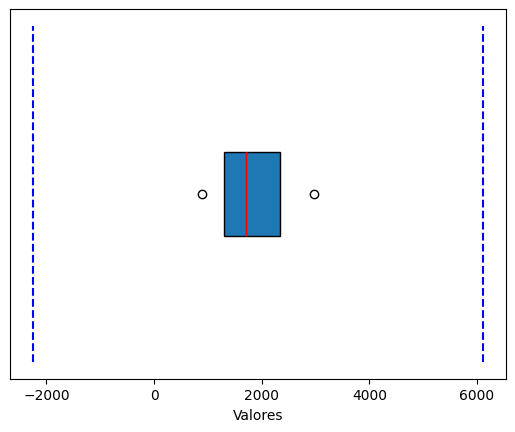

In [69]:
# Crear el diagrama de caja
plt.boxplot([Q1, mediana, Q3], vert=False, widths=0.5, positions=[0], whis=[25, 75], showcaps=False, patch_artist=True, medianprops={'color': 'red'})

# Agregar líneas adicionales para los límites superior e inferior
plt.vlines([limiteInferior, limiteSuperior], ymin=-1, ymax=1, color='blue', linestyle='dashed')

# Configurar el eje
plt.yticks([])  # Desactivar etiquetas en el eje y
plt.xlabel('Valores')

# Mostrar el diagrama de caja
plt.show()